# Project: Predicting Mount Everest Climbing Success Using Machine Learning
**Goal:** Predict whether a climber will successfully summit Mount Everest based on features like age, experience, route, season, and more.

### Step 1: Import Libraries

In [34]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve

### Step 2: Load Dataset & Filter for Everest

In [35]:
# Load Dataset
df_all = pd.read_csv("members.csv")
print("Number of rows:", df_all.shape[0])
df_all.head()

Number of rows: 89000


C:\Users\sebpr\AppData\Local\Temp\ipykernel_22312\1017832525.py:2: DtypeWarning:

Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.



expid  membid peakid  myear mseason         fname      lname sex  \
0  AMAD01101       2   AMAD   2001  Spring         Rohan    Buckley   M   
1  AMAD01101       1   AMAD   2001  Spring  Marc Cameron   Fairhead   M   
2  AMAD01101       3   AMAD   2001  Spring          Mark  Schroeder   M   
3  AMAD01101       4   AMAD   2001  Spring         Colin      Smith   M   
4  AMAD01101       5   AMAD   2001  Spring         Naomi      Smith   F   

      yob    citizen  ...  death deathdate deathtime  deathtype  deathhgtm  \
0  1972.0  Australia  ...  False       NaN       NaN        NaN          0   
1  1968.0  Australia  ...  False       NaN       NaN        NaN          0   
2  1960.0  Australia  ...  False       NaN       NaN        NaN          0   
3  1966.0  Australia  ...  False       NaN       NaN        NaN          0   
4  1970.0  Australia  ...  False       NaN       NaN        NaN          0   

   deathclass               msmtbid  \
0         NaN         No summit bid   
1         NaN  Aborted at high camp   
2         NaN  Aborted at high camp   
3         NaN         No summit bid   
4         NaN         No summit bid   

                                            msmtterm  hcn  mchksum  
0                  Did not climb or intent to summit  NaN  2439554  
1  Bad conditions (deep snow, avalanches, falling...  NaN  2438062  
2  Bad conditions (deep snow, avalanches, falling...  NaN  2435183  
3                  Did not climb or intent to summit  NaN  2437475  
4                  Did not climb or intent to summit  NaN  2438996  

[5 rows x 61 columns]

In [36]:
# Filter Everest
df = df_all[df_all["peakid"] == "EVER"].copy()
df.reset_index(drop=True, inplace=True) ## Reset index
print("Number of Everest:", df.shape[0])
df.head()

Number of Everest: 25274


expid  membid peakid  myear mseason         fname        lname sex  \
0  EVER01151       3   EVER   2001  Spring         Scott       Ferris   M   
1  EVER01151       2   EVER   2001  Spring          Paul        Karis   M   
2  EVER01151       1   EVER   2001  Spring      Theodore      Kossart   M   
3  EVER01151       4   EVER   2001  Spring       Patrick  Van Prooyen   M   
4  EVER01101       1   EVER   2001  Spring  Brant Edward       Didden   M   

      yob    citizen  ...  death deathdate deathtime  deathtype  deathhgtm  \
0  1972.0  Australia  ...  False       NaN       NaN        NaN          0   
1  1969.0  Australia  ...  False       NaN       NaN        NaN          0   
2  1968.0  Australia  ...  False       NaN       NaN        NaN          0   
3  1977.0  Australia  ...  False       NaN       NaN        NaN          0   
4  1970.0        USA  ...  False       NaN       NaN        NaN          0   

   deathclass                  msmtbid  \
0         NaN  Aborted below high camp   
1         NaN            No summit bid   
2         NaN  Aborted below high camp   
3         NaN              Unspecified   
4         NaN  Aborted above high camp   

                                          msmtterm  hcn  mchksum  
0  Lack of supplies, support or equipment problems  NaN  2439690  
1                         Other illnesses or pains  NaN  2438655  
2                         Other illnesses or pains  NaN  2438291  
3                                      Unspecified  NaN  2441341  
4                                O2 system failure  NaN  2438941  

[5 rows x 61 columns]

### Step 3: Exploratory Data Analysis (EDA) and Visalization 

####  3.1 Explore the Data

In [37]:
# Check missing values
nan = df.isna().sum()
nan = nan[nan > 0].sort_values(ascending=False) ## Show only the missing values in ascending order.
nan

msmttime3     25270
msmtdate3     25266
hcn           25160
msmttime2     25156
msmtdate2     25108
deathtime     25101
deathdate     24940
deathtype     24934
deathclass    24934
msmttime1     15188
mo2note       14737
occupation    10857
msmtdate1      7206
mperhighpt     5846
residence      1789
yob            1309
lname           703
fname            28
dtype: int64

In [38]:
# Drop irrelevant or mostly empty columns
drop_cols = [
    "msmttime3", "msmtdate3", "hcn",
    "msmttime2", "msmtdate2",
    "deathtime", "deathdate", "deathtype", "deathclass",
    "msmttime1", "msmtdate1", "mo2note", "occupation",
    "lname", "fname", "residence"
]

df.drop(columns=drop_cols, inplace=True)

In [39]:
# Create age feature from Year of Birth & Expedition Year
df["age"] = df["myear"] - df["yob"]
neg_age = (df["age"] < 0).sum() ## Check if the age is negative
nan_age = df["age"].isna().sum()  ## Print missing ages

print("Negative ages:", neg_age)
print("NaN ages:", nan_age)

# Replace negative ages with NaN first
df.loc[df['age'] < 0, 'age'] = np.nan

# Then fill all NaNs (including those from negative ages) with median
df['age'] = df['age'].fillna(df['age'].median())
print(df['age'])

Negative ages: 154
NaN ages: 1309
0        29.0
1        32.0
2        33.0
3        24.0
4        31.0
         ... 
25269    37.0
25270    37.0
25271    37.0
25272    37.0
25273    37.0
Name: age, Length: 25274, dtype: float64


In [40]:
# Basic info
df.info()
# Statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25274 entries, 0 to 25273
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   expid       25274 non-null  object 
 1   membid      25274 non-null  int64  
 2   peakid      25274 non-null  object 
 3   myear       25274 non-null  int64  
 4   mseason     25274 non-null  object 
 5   sex         25274 non-null  object 
 6   yob         23965 non-null  float64
 7   citizen     25274 non-null  object 
 8   status      25274 non-null  object 
 9   leader      25274 non-null  bool   
 10  deputy      25274 non-null  bool   
 11  bconly      25274 non-null  bool   
 12  nottobc     25274 non-null  bool   
 13  support     25274 non-null  bool   
 14  disabled    25274 non-null  bool   
 15  hired       25274 non-null  bool   
 16  sherpa      25274 non-null  bool   
 17  tibetan     25274 non-null  bool   
 18  msuccess    25274 non-null  bool   
 19  mclaimed    25274 non-nul

membid         myear           yob    mperhighpt       mroute1  \
count  25274.000000  25274.000000  23965.000000  19428.000000  25274.000000   
mean      11.365712   2005.801654   1969.307991   8424.662343      0.729327   
std       11.295719     14.378900     15.920407    774.591812      0.468082   
min        1.000000   1921.000000   1865.000000   4910.000000      0.000000   
25%        3.000000   1995.000000   1959.000000   8300.000000      0.000000   
50%        8.000000   2009.000000   1970.000000   8849.000000      1.000000   
75%       15.000000   2017.000000   1981.000000   8849.000000      1.000000   
max       99.000000   2024.000000   2008.000000   8850.000000      4.000000   

            mroute2       mroute3      mascent1      mascent2  mascent3  \
count  25274.000000  25274.000000  25274.000000  25274.000000   25274.0   
mean       0.006608      0.000317     15.703569      0.089024       0.0   
std        0.081507      0.017789     67.871627      5.433001       0.0   
min        0.000000      0.000000      0.000000      0.000000       0.0   
25%        0.000000      0.000000      0.000000      0.000000       0.0   
50%        0.000000      0.000000      0.000000      0.000000       0.0   
75%        0.000000      0.000000      0.000000      0.000000       0.0   
max        2.000000      1.000000    452.000000    444.000000       0.0   

          deathhgtm       mchksum           age  
count  25274.000000  2.527400e+04  25274.000000  
mean      96.534185  2.256897e+06     37.740920  
std      843.363802  6.405446e+05     11.452985  
min        0.000000 -2.165000e+03      0.000000  
25%        0.000000  2.433820e+06     30.000000  
50%        0.000000  2.438344e+06     37.000000  
75%        0.000000  2.442399e+06     45.000000  
max     8830.000000  2.466698e+06    118.000000

In [41]:
# Replace invalid/extreme ages with NaN
df.loc[df['age'] < 15, 'age'] = np.nan   # Ages less than 15 are unrealistic
df.loc[df['age'] > 80, 'age'] = np.nan   # Ages greater than 80 are unrealistic

# Fill missing values with median
df['age'] = df['age'].fillna(df['age'].median())

# Verify
print(df['age'].describe())

count    25274.000000
mean        38.118026
std         10.456443
min         15.000000
25%         31.000000
50%         37.000000
75%         44.000000
max         80.000000
Name: age, dtype: float64


In [42]:
# Two Binary columns containing values other than 0 or 1. 
cols = ['mroute1', 'mroute2']

# Replace invalid values (anything not 0 or 1) with NaN
df[cols] = df[cols].applymap(lambda x: x if x in [0,1] else np.nan)

# Fill NaNs with mode of each column
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\sebpr\AppData\Local\Temp\ipykernel_22312\235062401.py:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\sebpr\AppData\Local\Temp\ipykernel_22312\235062401.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





**Conclusion:** 

- The data was downloaded as a CSV file from the Himalayan Expeditions dataset on Maven Analytics (link: https://mavenanalytics.io/data-playground/himalayan-expeditions?utm_source=chatgpt.com)
), which is based on historical data from the Himalayan Database. The full dataset is quite large, containing 89,000 rows and 61 columns.
- The data was filtered to include only Everest climbs (peak_id == "EVER"), and missing values were reduced, resulting in a dataset of 25,274 rows and 46 columns.
- A new column, age, was created using the year of birth and the year of the expedition. Missing or negative values were replaced with the median, and unrealistic ages (those unlikely to climb a mountain) were filtered out, keeping ages between 15 and 80.

####  3.2 Data Visaulization

In [43]:
## Check Label/taget column distribution

# Map numeric/coded values to labels
df['msuccess_label'] = df['msuccess'].map({True: 'Success', False: 'Fail'})

# Create pie chart with labels and percentages shown on the slices
fig_target_columns = px.pie(
    df,
    names='msuccess_label',        # Labels for slices
    title='Distribution of Success vs Fail',
    color='msuccess_label',        # Color by label
)

# Show counts and percentages on the slices
fig_target_columns.update_traces(textinfo='label+percent+value', pull=[0.05, 0.05])

fig_target_columns.show()

**Conclusion:** The dataset contains a roughly equal number of successful and failed climbs, which is beneficial for machine learning models because balanced classes help prevent bias toward one outcome.


In [61]:
## Check Distribution of Numeric Columns Related to Success

# Map numeric/coded values to labels (you already did this)
df['msuccess_label'] = df['msuccess'].map({True: 'Success', False: 'Fail'})
for col in ['myear', 'age', 'mperhighpt']:
    fig = px.histogram(
        df, 
        x=col, 
        color='msuccess_label',
        nbins=30, 
        marginal="box",  # adds a boxplot
        title=f'Distribution of {col}'
    )
    fig.show()

**Conclusion:** 
- Most climbers attempted Everest between 2015 and 2019. Notably, the highest number of successful summits was observed in 2005 and 2024.
- The age distribution of Everest climbers shows that most climbers are between 35 and 39 years old. This is the peak range for both successful and unsuccessful climbs. While climbers of all adult ages attempt Everest, the majority fall in their mid-30s, which may reflect a combination of physical fitness and experience.
- Personal hight point meter lead to data leak since the data regist after the climbing 

In [45]:
# Check categorical columns to plot
categorical_cols = ['sex', 'mseason', 'death']

# Loop through each column and plot histogram
for col in categorical_cols:
    fig = px.histogram(
        df,
        x=col,
        color='msuccess',  # Color by 'msuccess' if available
        title=f'Distribution of {col}',
    )
    fig.show()

**Conclusion:** 
- The majority of climbers are male, with approximately 50% successfully reaching the summit of Everest.
- Climbing activity is highest in spring, while failure rates increase in autumn, and fewer climbs occur during summer and winter.
- About 1% of climbers die during their ascent.

In [46]:
# Group by country and success
country_counts = df.groupby(['citizen', 'msuccess']).size().reset_index(name='count')

# Plot a bubble map showing success/fail counts
fig = px.scatter_geo(
    country_counts,
    locations='citizen',
    locationmode='country names', 
    color='msuccess',              # success vs fail
    size='count',                  # bubble size = number of climbers
    hover_name='citizen',
    hover_data=['count'],
    title='Climbers by Country and Success'
)

fig.show()

**Conclusion:** 
- The majority of climbers are from Nepal and the United States, with high success rates. In contrast, climbers from Africa and Sount Amarica are fewer and have lower success rates.

In [47]:
# Heatmap of linear correlations for numeric, boolean, and binary features
# Excludes features recorded after the climb to prevent data leakage
cols = [
    "leader", "deputy", "sherpa",
    "mo2used", "mo2climb", "hired", "mroute1", 
    "age", "mspeed", "disabled", "msolo", "hired",
    "msuccess"
]

# Compute correlation matrix (pandas automatically handles NaN)
corr = df[cols].corr()

# Plot heatmap
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Feature Correlation Heatmap (Everest)"
)

fig.update_layout(
    width=800,
    height=700
)

fig.show()



**Conclusion:** 
- Oxygen usage (mo2used, mo2climb) is the strongest predictor of success.
- Sherpa support and route choice have a noticeable but moderate effect.
- Age, leadership roles, and medical oxygen have little effect.
- Some features are highly correlated among themselves (like mo2used and mo2climb), so they may be redundant in a model.

### Step 4: Machine learning (ML)

In [48]:
## Step 1: Separate Target from feature variables 
# Select features that are relevant for predicting success, without redundancy or data leakage.
features_list = [
    'age',        # physiological factor
    'sex',        # demographic
    'mseason',    # weather/seasonal conditions
    'leader',     # experience / responsibility
    'hired',      # professional support 
    'tibetan',    # local altitude familiarity
    'msolo',      # risk behavior
    'mo2used',    # planned oxygen usage (ALLOWED for planning)
    'mroute1',    # planned route
]
target = 'msuccess'
# Split data
X = df[features_list]
y = df[target]

In [49]:
## Step 2: Train / Test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

In [50]:
## Step 3: Pipeline for missing values, standardized and OneHotEncoder
# Feature types
numeric_features = ['age']

categorical_features = [
    'sex',
    'mseason'
]

boolean_features = [
    'leader',
    'hired',
    'tibetan',
    'msolo',
    'mo2used',
    'mroute1'
]
# Numeric Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Categorical Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
# Boolean Pipeline
boolean_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine all features
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('bool', boolean_transformer, boolean_features)
])

# fit data to train and test set 
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared  = preprocessor.transform(X_test)

### Model 1: Logistic Regression

In [51]:
## Step 4: Build the Model 1: LogisticRegression 
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state= 0))
])

# Fit pipeline
lr_pipeline.fit(X_train, y_train)


c:\Data_Sci_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'mseason']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['leader', 'hired', 'tibetan',
                                                   'msolo', 'mo2used',
                                                   'mroute1'])])),
                ('classifier', LogisticRegression(random_state=0))])

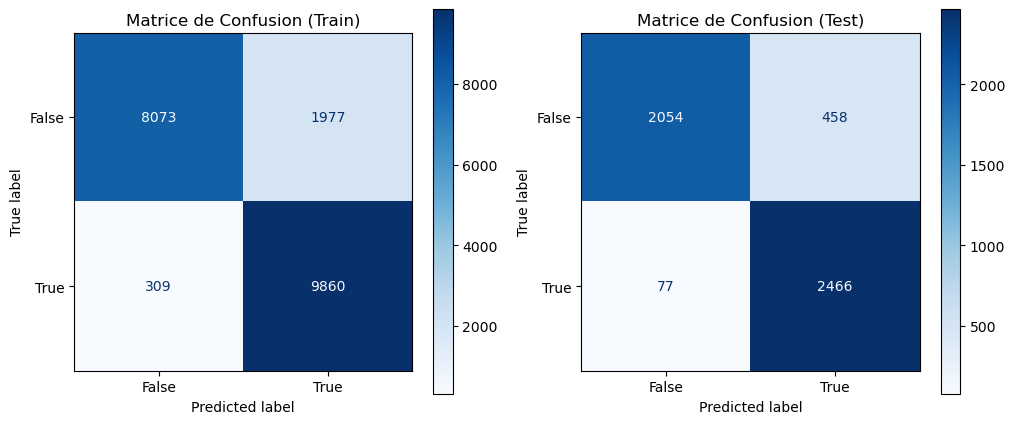

Model 1: logisticRegression
ROC-AUC: 0.9329
Accuracy Train : 0.8869
Accuracy Test  : 0.8942
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.96      0.82      0.88      2512
        True       0.84      0.97      0.90      2543

    accuracy                           0.89      5055
   macro avg       0.90      0.89      0.89      5055
weighted avg       0.90      0.89      0.89      5055

-> The model is robust (no major overfitting).


In [52]:
## Step 5 Evaluation Model 1 (LogisticRegression)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_estimator(lr_pipeline, X_train, y_train, ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title("Matrice de Confusion (Train)")

ConfusionMatrixDisplay.from_estimator(lr_pipeline, X_test, y_test, ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title("Matrice de Confusion (Test)")

plt.show()

print("Model 1: logisticRegression")
# Predict probabilities for the positive class (success)
y_prob = lr_pipeline.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))

# Accuracy
train_acc = lr_pipeline.score(X_train, y_train)
test_acc  = lr_pipeline.score(X_test, y_test)

print(f"Accuracy Train : {train_acc:.4f}")
print(f"Accuracy Test  : {test_acc:.4f}")

# Classification report
y_pred = lr_pipeline.predict(X_test)
print("Classification Report (Test):")
print(classification_report(y_test, y_pred))

# Quick overfitting check
if abs(train_acc - test_acc) < 0.05:
    print("-> The model is robust (no major overfitting).")
else:
    print("-> Warning: Significant difference between Train and Test (risk of overfitting).")


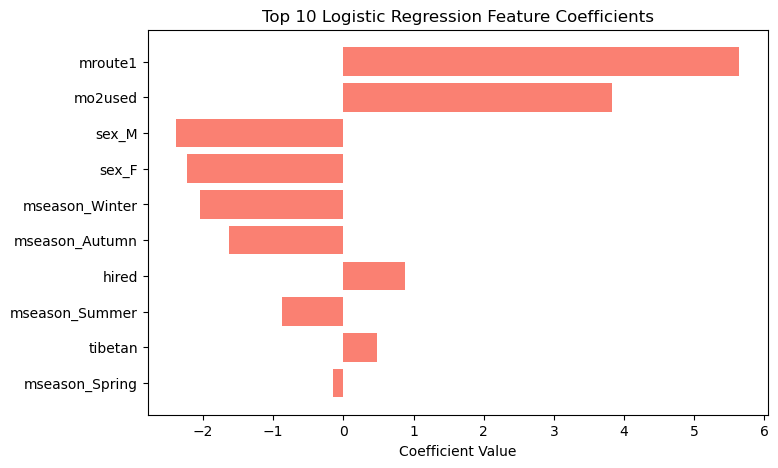

In [53]:
## Step 6 plot feature importance

# --- Extract feature names from pipeline ---
preprocessor = lr_pipeline.named_steps['preprocessor']

# Numeric features
numeric_features = ['age']

# Categorical features
cat_transformer = preprocessor.named_transformers_['cat']
if isinstance(cat_transformer, Pipeline):
    ohe = cat_transformer.named_steps['encoder']
else:
    ohe = cat_transformer

cat_features = ohe.get_feature_names_out(['sex','mseason'])

# Boolean features
bool_features = ['leader','hired','tibetan','msolo','mo2used','mroute1']

# All feature names
all_features = list(numeric_features) + list(cat_features) + list(bool_features)

# Coefficients
coefs = lr_pipeline.named_steps['classifier'].coef_[0]

# Create DataFrame sorted by absolute value (top 10)
feat_coef_df = pd.DataFrame({
    'feature': all_features,
    'coefficient': coefs
})
feat_coef_df['abs_coef'] = feat_coef_df['coefficient'].abs()
feat_coef_df = feat_coef_df.sort_values(by='abs_coef', ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_coef_df['feature'], feat_coef_df['coefficient'], color='salmon')
plt.gca().invert_yaxis()
plt.title("Top 10 Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


### Model 2: Random Forest 

In [54]:
## Step 4: Build the Model 2 Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=0,
    ))
])
# Fit the pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'mseason']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['leader', 'hired', 'tibetan',
                                                   'msolo', 'mo2used',
                                                   'mroute1'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=0))])

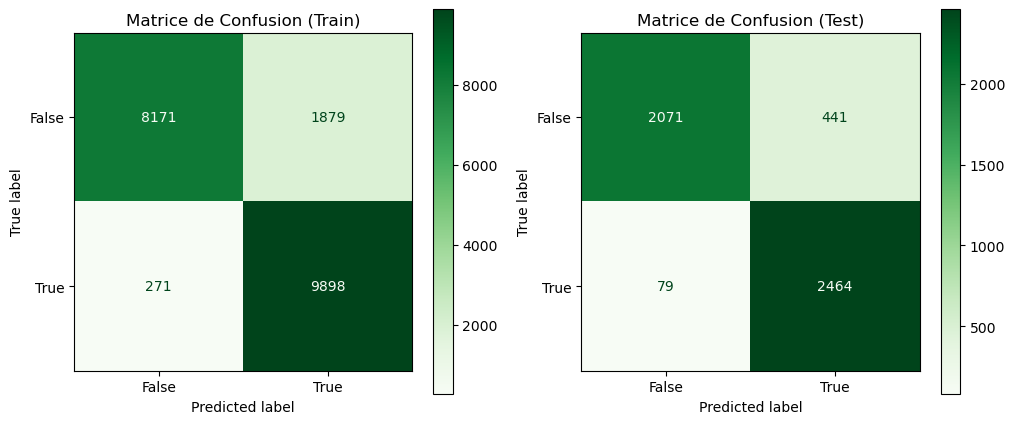

Model 2: RandomForest
ROC-AUC: 0.932
Accuracy Train : 0.8937
Accuracy Test  : 0.8971
Classification Report (Test):
              precision    recall  f1-score   support

       False       0.96      0.82      0.89      2512
        True       0.85      0.97      0.90      2543

    accuracy                           0.90      5055
   macro avg       0.91      0.90      0.90      5055
weighted avg       0.91      0.90      0.90      5055

-> The model is robust (no major overfitting).


In [55]:
## Step 5 Evaluation Model 2 (Random Forest)

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_train, y_train, ax=ax[0], cmap=plt.cm.Greens)
ax[0].set_title("Matrice de Confusion (Train)")

ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test, ax=ax[1], cmap=plt.cm.Greens)
ax[1].set_title("Matrice de Confusion (Test)")

plt.show()

print("Model 2: RandomForest")
# Predict probabilities for the positive class (success)
y_prob = rf_pipeline.predict_proba(X_test)[:, 1]
print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
  
# Accuracy
train_acc = rf_pipeline.score(X_train, y_train)
test_acc  = rf_pipeline.score(X_test, y_test)

print(f"Accuracy Train : {train_acc:.4f}")
print(f"Accuracy Test  : {test_acc:.4f}")

# Classification report
y_pred = rf_pipeline.predict(X_test)
print("Classification Report (Test):")
print(classification_report(y_test, y_pred))

# Quick overfitting check
if abs(train_acc - test_acc) < 0.05:
    print("-> The model is robust (no major overfitting).")
else:
    print("-> Warning: Significant difference between Train and Test (risk of overfitting).")

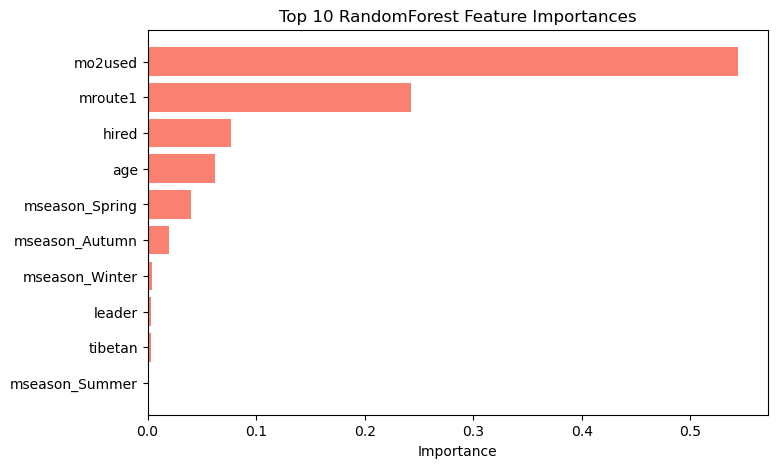

In [56]:
## Step 6 plot feature importance

# --- Extract feature names from pipeline ---
preprocessor = rf_pipeline.named_steps['preprocessor']

# Numeric features
numeric_features = ['age']

# Categorical features
cat_transformer = preprocessor.named_transformers_['cat']
if isinstance(cat_transformer, Pipeline):
    ohe = cat_transformer.named_steps['encoder']
else:
    ohe = cat_transformer

cat_features = ohe.get_feature_names_out(['sex','mseason'])

# Boolean features
bool_features = ['leader','hired', 'tibetan','msolo','mo2used','mroute1']

# All feature names
all_features = list(numeric_features) + list(cat_features) + list(bool_features)

# Feature importances (RandomForest)
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create DataFrame sorted by absolute value (top 10)
feat_imp_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'], color='salmon')
plt.gca().invert_yaxis()
plt.title("Top 10 RandomForest Feature Importances")
plt.xlabel("Importance")
plt.show()


Model 3: Random Forest (Hyperparameter Tuning and Threshold)

In [57]:
## Step 4: Build the Model 3 Random Forest (Parameter Tuning)
rf_pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        min_samples_leaf= 5,
        n_estimators=500,
        random_state=0,
        class_weight={0: 1.5, 1: 1}
    ))
])
# Fit the pipeline
rf_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'mseason']),
                                                 ('bool',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['leader', 'hired', 'tibetan',
                                                   'msolo', 'mo2used',
                                                   'mroute1'])])),
                ('classifier',
                 RandomForestClassifier(class_weight={0: 1.5, 1: 1},
                                        min_samples_leaf=5, n_estimators=500,
                                        random_state=0))])

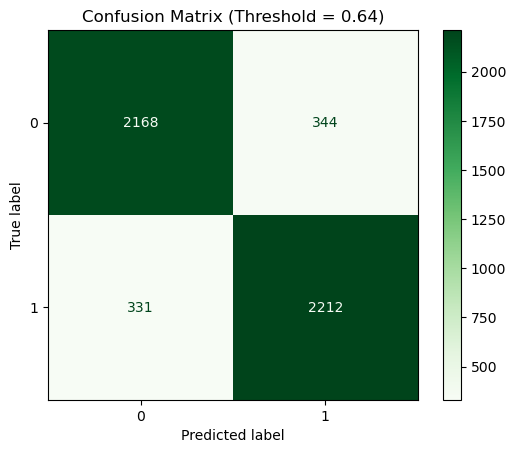

Classification Report (Threshold = 0.64):
              precision    recall  f1-score   support

       False       0.87      0.86      0.87      2512
        True       0.87      0.87      0.87      2543

    accuracy                           0.87      5055
   macro avg       0.87      0.87      0.87      5055
weighted avg       0.87      0.87      0.87      5055

ROC-AUC : 0.9350
Accuracy Test : 0.8665


In [58]:
## Step 5 Evaluation Model 3 (Random Forest_parameter Tuning)

#  Predict probabilities for positive class (Success)
y_prob = rf_pipeline2.predict_proba(X_test)[:, 1]

# Apply custom threshold

threshold = 0.64 # Adjust for more conservative predictions
y_pred_threshold = (y_prob >= threshold).astype(int)

# Confusion Matrix (Threshold-adjusted)
cm = confusion_matrix(y_test, y_pred_threshold)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Greens)
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.show()


# Classification Report
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_threshold))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC : {roc_auc:.4f}")

# Accuracy (threshold-adjusted)
test_acc = (y_pred_threshold == y_test).mean()
print(f"Accuracy Test : {test_acc:.4f}")




In [59]:
## Plot graph to compared 3 models

models = {
    "lr": lr_pipeline,
    "rf": rf_pipeline,
    "rf2": rf_pipeline2,
}
data = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predict probabilities if available
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        if name == "rf2":  # Apply threshold for rf2
            y_pred = (y_prob >= threshold).astype(int)
        else:
            y_pred = (y_prob >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
        y_prob = None
    
    # Metrics for success
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    data.append({"Model": name, "Metric": "Precision (Success)", "Score": precision})
    data.append({"Model": name, "Metric": "Recall (Success)", "Score": recall})
    data.append({"Model": name, "Metric": "F1-score (Success)", "Score": f1})
    
    # ROC-AUC if probabilities exist
    if y_prob is not None:
        roc = roc_auc_score(y_test, y_prob)
        data.append({"Model": name, "Metric": "ROC-AUC", "Score": roc})

# Create DataFrame
df_metrics = pd.DataFrame(data)

# Format Score for display
df_metrics['Score_text'] = df_metrics['Score'].map(lambda x: f"{x:.2f}")

# Plot grouped bar chart
fig = px.bar(
    df_metrics,
    x="Metric",
    y="Score",
    color="Model",
    barmode="group",
    text="Score_text",
    title="Comparison of Models for Everest Climbing Success",
)

# Force y-axis 0-1
fig.update_yaxes(range=[0, 1])

# Highlight recommended model (rf2) in green
for i, model_name in enumerate(df_metrics["Model"].unique()):
    if model_name == "rf2":
        fig.data[i].marker.color = "green"

# Add annotation for recommendation
fig.add_annotation(
    x=2.5, y=1.02,
    text="Recommended Model → rf2 (Random Forest, Threshold=0.66) for Safety",
    showarrow=False,
    font=dict(size=14, color="green")
)

fig.show()


c:\Data_Sci_learning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [60]:
## Samples of Prediction

future_climber = pd.DataFrame([{
    'age': 45,
    'sex': 'F',
    'mseason': 'Spring',
    'leader': 0,
    'hired': 0,
    'tibetan': 0,
    'msolo': 0,
    'mo2used': 1,
    'mroute1': 1,
}])

prob = rf_pipeline2.predict_proba(future_climber)[0, 1]
print(f"Predicted probability of success: {prob:.2%}")


Predicted probability of success: 65.95%


**Conclusion:** 
- Tuned Random Forest (RF2) is the most reliable for predicting climbing safety and success on Everest.
- RF2 optimally balances precision, recall, and overall discrimination, reducing false positives (predicting success when failure is possible).
- Logistic Regression (LR) and standard Random Forest (RF) have higher recall but lower precision, which may overestimate success.
-  Instead of providing a simple “success” or “failure,” we use the model to predict the probability of success, offering a safer and more informed basis for decision-making.